In [154]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sympy import *
%matplotlib inline 
import time 

In [155]:
a = -3
b = 2
e = 0.0001

A3 = 1
A2 = 2
A1 = 2
A0 = 1

In [156]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0

In [157]:
def find_d():
    x= symbols('x')
    return diff(func(x), x)

In [158]:
def find_dd():
    x= symbols('x')
    return diff(func(x), x, 2)  

In [159]:
def f_der(x):
    return 4*x**3 + 3*x**2 + 4*x + 2

In [160]:
def line(x, x1, y1):
    return f_der(x1)*(x - x1) + y1

In [163]:
def find_min(a, b, e):
    fa = func(a)
    fb = func(b)

    fdda = find_dd().evalf(subs={x: a})
    fddb = find_dd().evalf(subs={x: b})

    d = {} 

    if  fa * fdda > 0:
        z = a
    elif fb * fddb > 0:
        z = b 

    while True:
        fdz = find_d().evalf(subs={x: z})
        fddz = find_dd().evalf(subs={x: z})
        delta = fdz / fddz
        z = z - delta

        d[z] = func(z)

        if abs(delta) < e:
            x_min = z
            f_min = func(x_min)
            break
    
    xi = np.linspace(-3, 2, 100)
    plt.figure(figsize=(15,8))
    plt.plot(xi, [func(x) for x in xi], 'g')
    plt.plot(list(d.keys()), list(d.values()), 'o', color='b')
    plt.plot(x_min, f_min, 'ro')

    for i in list(d.keys()):
        xrange = np.linspace(int(round(i)-1), int(round(i)+1), 10)
        plt.plot(xrange, line(xrange, i, func(i)), '--', color='grey', linewidth = 2)
    
    plt.grid(True)
    plt.legend(['Функция f(x)', 'Промежуточные точки', 'Точка минимума', 'Касательная к графику функции'], loc=1)
    return f'Минимум функции, равный {f_min}, достигается в точке x={x_min}. Количество итераций равно {len(d)}.' 

'Минимум функции, равный 0.429928645514461, достигается в точке x=-0.559621976341422. Количество итераций равно 7.'

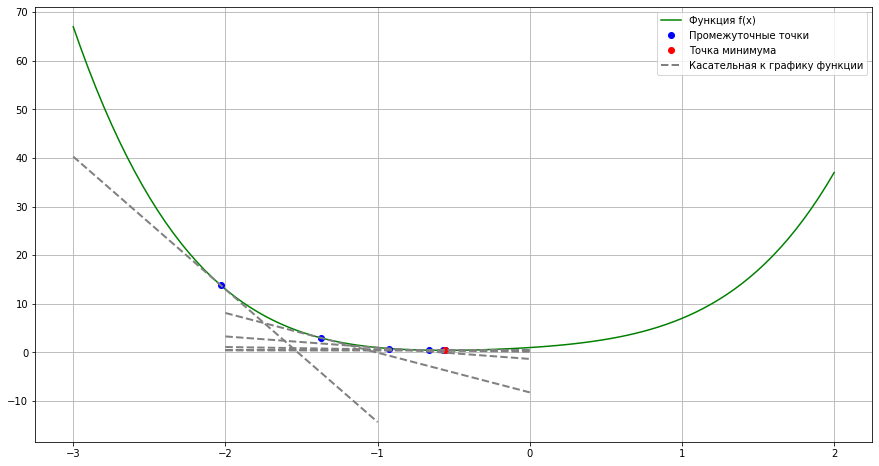

In [164]:
find_min(a, b, e) 